## Lecture Demo

In [2]:
# Import libries need with alias

!{sys.executable} -m pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as numpy
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#set style and font size
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

# Read in TN middle school dataset(hint it should be in the same folder as this noteboke)
df = pd.read_csv('middle_tn_schools.csv')
df.head()

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


,name,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
0,Allendale Elementary School,5.0,851.0,10.0,90.2,95.8,15.7,Public,89.4,85.2,54.0,2.9,85.5,1.6,5.6
1,Anderson Elementary,2.0,412.0,71.0,32.8,37.3,12.8,Public,43.0,38.3,32.0,3.9,86.7,1.0,4.9
2,Avoca Elementary,4.0,482.0,43.0,78.4,83.6,16.6,Public,75.7,73.0,29.0,1.0,91.5,1.2,4.4
3,Bailey Middle,0.0,394.0,91.0,1.6,1.0,13.1,Public Magnet,2.1,4.4,30.0,80.7,11.7,2.3,4.3
4,Barfield Elementary,4.0,948.0,26.0,85.3,89.2,14.8,Public,81.3,79.6,64.0,11.8,71.2,7.1,6.0


### EDA

In [3]:
#check for null values in all columns
df.isnull().sum()

name                   0
school_rating          0
size                   0
reduced_lunch          0
state_percentile_16    0
state_percentile_15    6
stu_teach_ratio        0
school_type            0
avg_score_15           6
avg_score_16           0
full_time_teachers     0
percent_black          0
percent_white          0
percent_asian          0
percent_hispanic       0
dtype: int64

In [4]:
#check distribution of categorical fields

df['school_type'].value_counts()

Public            292
Public Magnet      46
Public Charter      8
Public Virtual      1
Name: school_type, dtype: int64

In [5]:
#check measures of central tendency

df.describe()

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
count,347.000000,347.000000,347.000000,347.000000,341.000000,347.000000,341.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,2.968300,699.472622,50.279539,58.801729,58.249267,15.461671,57.004692,57.049856,44.939481,21.197983,61.673487,2.642651,11.164553
std,1.690377,400.598636,25.480236,32.540747,32.702630,5.725170,26.696450,27.968974,22.053386,23.562538,27.274859,3.109629,12.030608
min,0.000000,53.000000,2.000000,0.200000,0.600000,4.700000,1.500000,0.100000,2.000000,0.000000,1.100000,0.000000,0.000000
25%,2.000000,420.500000,30.000000,30.950000,27.100000,13.700000,37.600000,37.000000,30.000000,3.600000,40.600000,0.750000,3.800000
50%,3.000000,595.000000,51.000000,66.400000,65.800000,15.000000,61.800000,60.700000,40.000000,13.500000,68.700000,1.600000,6.400000
75%,4.000000,851.000000,71.500000,88.000000,88.600000,16.700000,79.600000,80.250000,54.000000,28.350000,85.950000,3.100000,13.800000
max,5.000000,2314.000000,98.000000,99.800000,99.800000,111.000000,99.000000,98.900000,140.000000,97.400000,99.700000,21.100000,65.200000


### ISOLATING FIELDS

Sally isolates reduced_lunch and groups the data by school_rating using pandas' groupbymethod and then uses describe on the re-shaped data.

In [6]:
#Isolate reduced lunch and school rating columns
#Group by School Rating
#run Describe on the results

df[['reduced_lunch', 'school_rating']].groupby(['school_rating']).describe()

reduced_lunch                                                  \
                      count       mean        std   min    25%   50%    75%   
school_rating                                                                 
0.0                    43.0  83.581395   8.813498  53.0  79.50  86.0  90.00   
1.0                    40.0  74.950000  11.644191  53.0  65.00  74.5  84.25   
2.0                    44.0  64.272727  11.956051  37.0  54.75  62.5  74.00   
3.0                    56.0  50.285714  13.550866  24.0  41.00  48.5  63.00   
4.0                    86.0  41.000000  16.681092   4.0  30.00  41.5  50.00   
5.0                    78.0  21.602564  17.651268   2.0   8.00  19.0  29.75   

                     
                max  
school_rating        
0.0            98.0  
1.0            98.0  
2.0            88.0  
3.0            78.0  
4.0            87.0  
5.0            87.0

Sally decides to look at reduced_lunch from another angle using a correlation matrix with pandas' corr method. The values in the correlation matrix table will be between -1 and 1.

In [7]:
# look athe the correlation
df[['reduced_lunch', 'school_rating']].corr()

# With .corr, you'll always get "1.0" as a value from the top left to the bottom right, because each value will correlate perfectly with itself.
# -82 is a strong negative correlation, meaning that the data strongly shows that as the school rating rises, the reduced lunches fall and vice-versa.

,reduced_lunch,school_rating
reduced_lunch,1.000000,-0.815757
school_rating,-0.815757,1.000000


### DISTRIBUTION WITHIN FIELDS

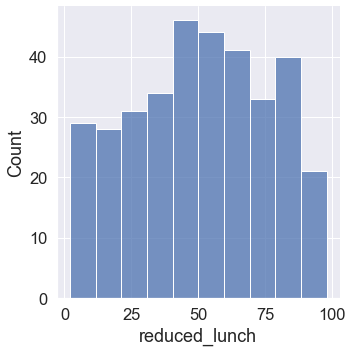

In [9]:
#seaborn histogram
sns.displot(df['reduced_lunch'])

#distribution is fairly flat, we would say this has "lower kurtosis"

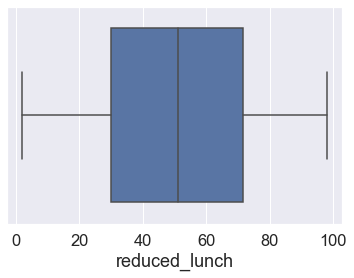

In [10]:
#seaborn boxplot
sns.boxplot(x=df['reduced_lunch'])

#median is ~50 and the interquartiles are around 30 and 70, which is what we observed earlier in .describe()

In [11]:
df['reduced_lunch'].skew()

-0.11269656363625385

In [12]:
df['reduced_lunch'].kurtosis()

-0.9722270865622078

### CORRELATIONS BETWEEN FIELDS

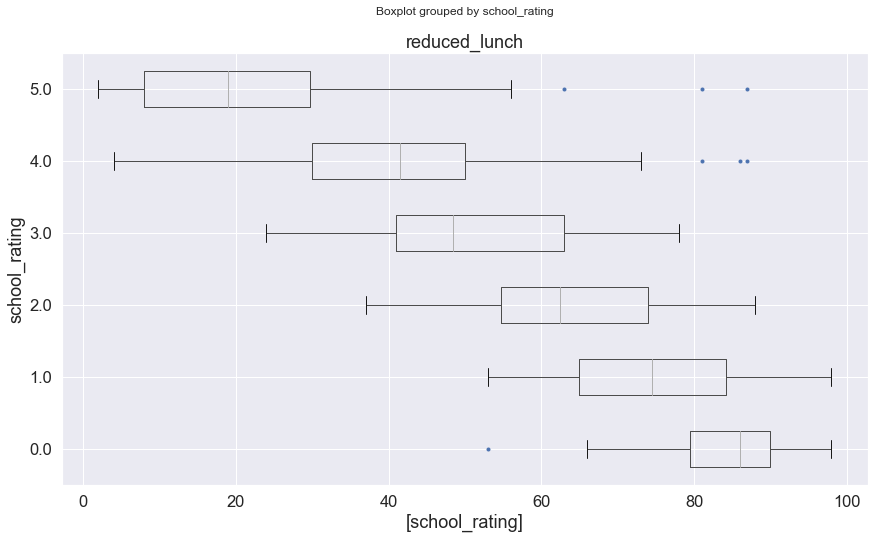

In [17]:
fig, ax = plt.subplots(figsize=(14,8))

ax.set_ylabel('school_rating')

# boxplot with only these two variables
df[['reduced_lunch', 'school_rating']].boxplot(by='school_rating', figsize=(13,8), vert=False, sym='b.', ax=ax)

To further examine the relationship between school_rating and reduced_lunch, Sally graphs the two variables on a scatter plot. 

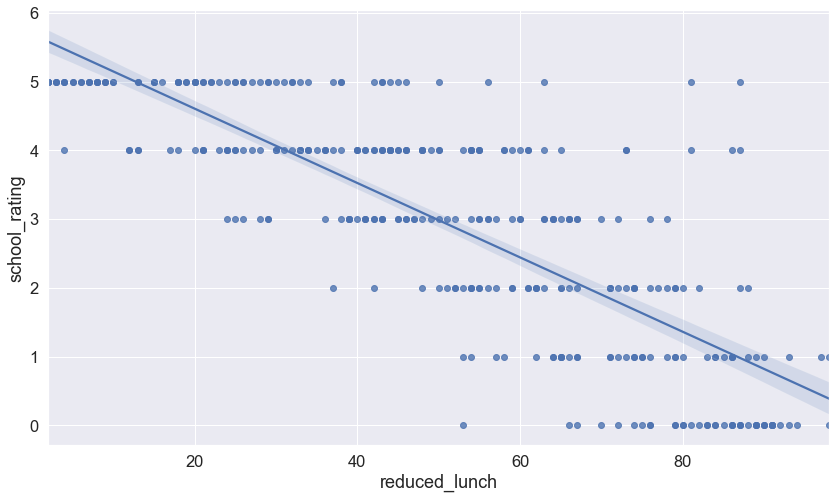

In [18]:
#scatter plot

plt.figure(figsize=(14,8))
_ = sns.regplot(data=df, x='reduced_lunch', y='school_rating')

### CORRELATION MATRIX

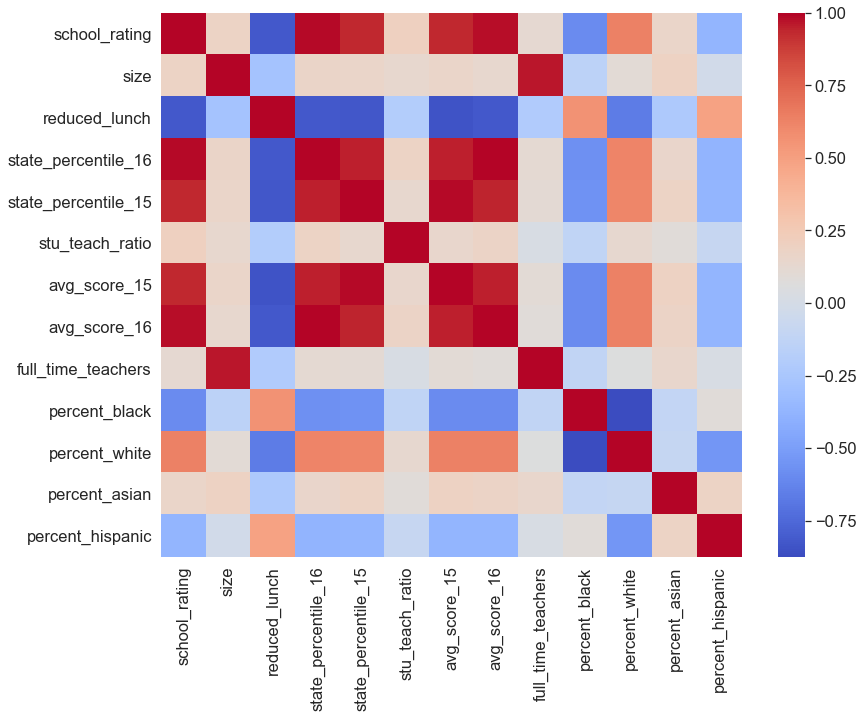

In [19]:
# create tabular correlation matrix
corr = df.corr()
_, ax = plt.subplots(figsize=(13,10)) 

# graph correlation matrix
_ = sns.heatmap(corr, ax=ax,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                cmap='coolwarm')

### Things to think about

Looking at the above correlation matrix are there any other relationships you would like to explore?

Click here to add your thoughts and feel free to add additional code blocks to test you ideas.